In [1]:
!pip install pandas scikit-learn numpy

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('large_data.csv')

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = dtc.predict(X_test)

In [8]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[313  40  35]
 [ 37 411   7]
 [ 48   4 337]]

Classification Report:
              precision    recall  f1-score   support

       COVID       0.79      0.81      0.80       388
   INFLUENZA       0.90      0.90      0.90       455
 VIRUS FEVER       0.89      0.87      0.88       389

    accuracy                           0.86      1232
   macro avg       0.86      0.86      0.86      1232
weighted avg       0.86      0.86      0.86      1232



In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.8612012987012987


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [11]:
symptoms_encoder = OneHotEncoder(handle_unknown='ignore')
symptoms_encoder.fit(X_train)
X_train_encoded = symptoms_encoder.transform(X_train)
X_test_encoded = symptoms_encoder.transform(X_test)

In [12]:
import numpy as np

In [14]:
cv_scores = cross_val_score(dtc, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.87418831 0.87337662 0.8612013  0.87175325 0.8058489 ]
Mean cross-validation score: 0.8572736767700212


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
cm = confusion_matrix(y_test, y_pred)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.tight_layout()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(len(np.unique(y_test))):
        for j in range(len(np.unique(y_test))):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()

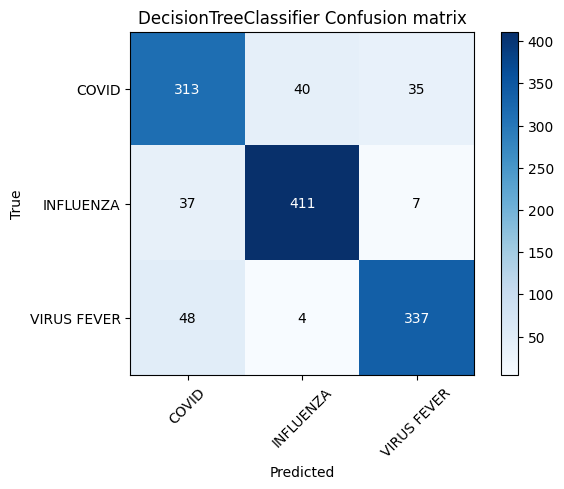

In [19]:
plot_confusion_matrix(dtc, X_test, y_test, 'DecisionTreeClassifier')